In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from h4rg_analysis import io
import makefigures_noise

In [4]:
rampids = makefigures_noise.load_rampids ()

In [6]:
rdx = 0
rid = rampids[rdx]

In [67]:
rampids[5]

'PFJB02401523'

In [11]:
bins = np.logspace(1.,2,300)

In [59]:
upper_arr = np.zeros([len(rampids), 3])

In [72]:
readtime = fits.getheader ( io.jhu2tiger(makefigures_noise.bestbaselines[rdx]), 0 )['W_FRMTIM']

In [79]:
rmap_l = []
for rid in rampids[[0,4]]:
    rmap_l.append(makefigures_noise.load_ratemap ( rid ))

In [ ]:
print('a')

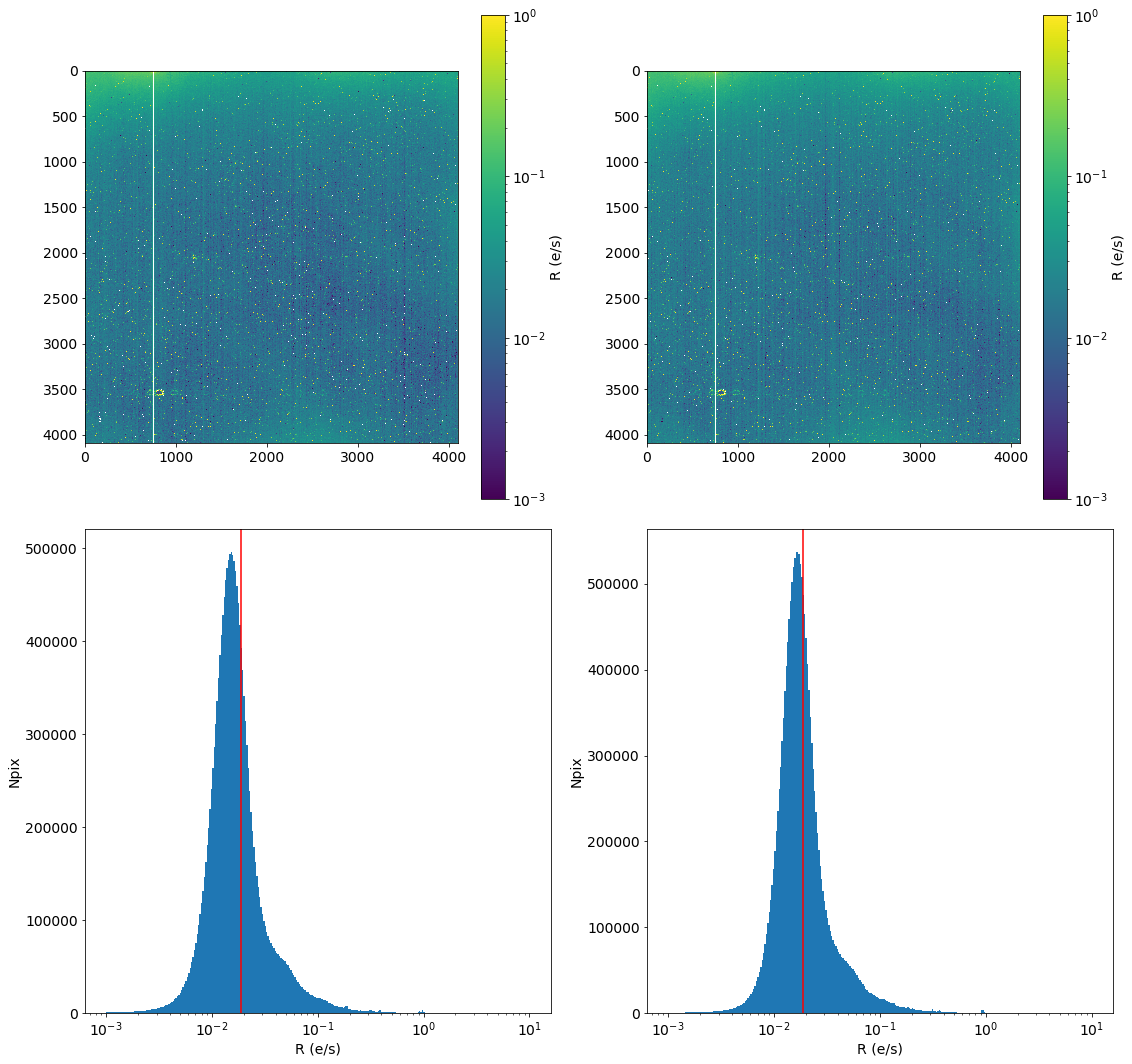

In [83]:
fig, axarr = plt.subplots(2,2,figsize=(16,15))
for idx in range(2):
    makefigures_noise.mk_utrrates ( rmap_l[idx], ax=axarr[0,idx])
    axarr[1,idx].hist(rmap_l[idx].flatten(), bins=np.logspace(-3,1,300))
for ax in axarr[1]:
    ax.set_xscale('log')
    ax.set_xlabel(r'R (e/s)')
    ax.set_ylabel(r'Npix')
    ax.axvline ( 0.019, color='r' )

plt.tight_layout ()
plt.savefig('../figures/rmap.png')

CPU times: user 5.61 s, sys: 1.94 s, total: 7.55 s
Wall time: 7.15 s


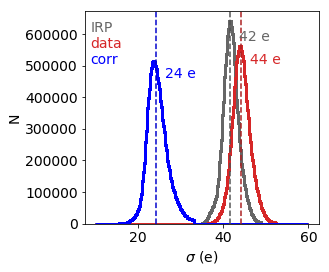

In [62]:
%%time
fsize=4
fig, ax = plt.subplots(1,1, figsize=(fsize*1.2,fsize))


idx=4
if np.isclose( upper_arr[idx], 0 ).all():
    upper = None
else:
    upper = upper_arr[idx]
var = makefigures_noise.load_variancemaps ( rampids[idx] )
out = makefigures_noise.mk_varhists ( var, ax=ax, upper=upper, )
upper_arr[idx] = out[1][:,5]

plt.tight_layout ()
plt.savefig(f'../figures/varhists_{rampids[idx]}.png')

/home/kadofong/extras/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/kadofong/extras/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/kadofong/extras/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kadofong/extras/scipy/stats/stats.py:3055: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
/home/kadofong/extras/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kadofong/extras/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


IndexError: index -1 is out of bounds for axis 0 with size 0

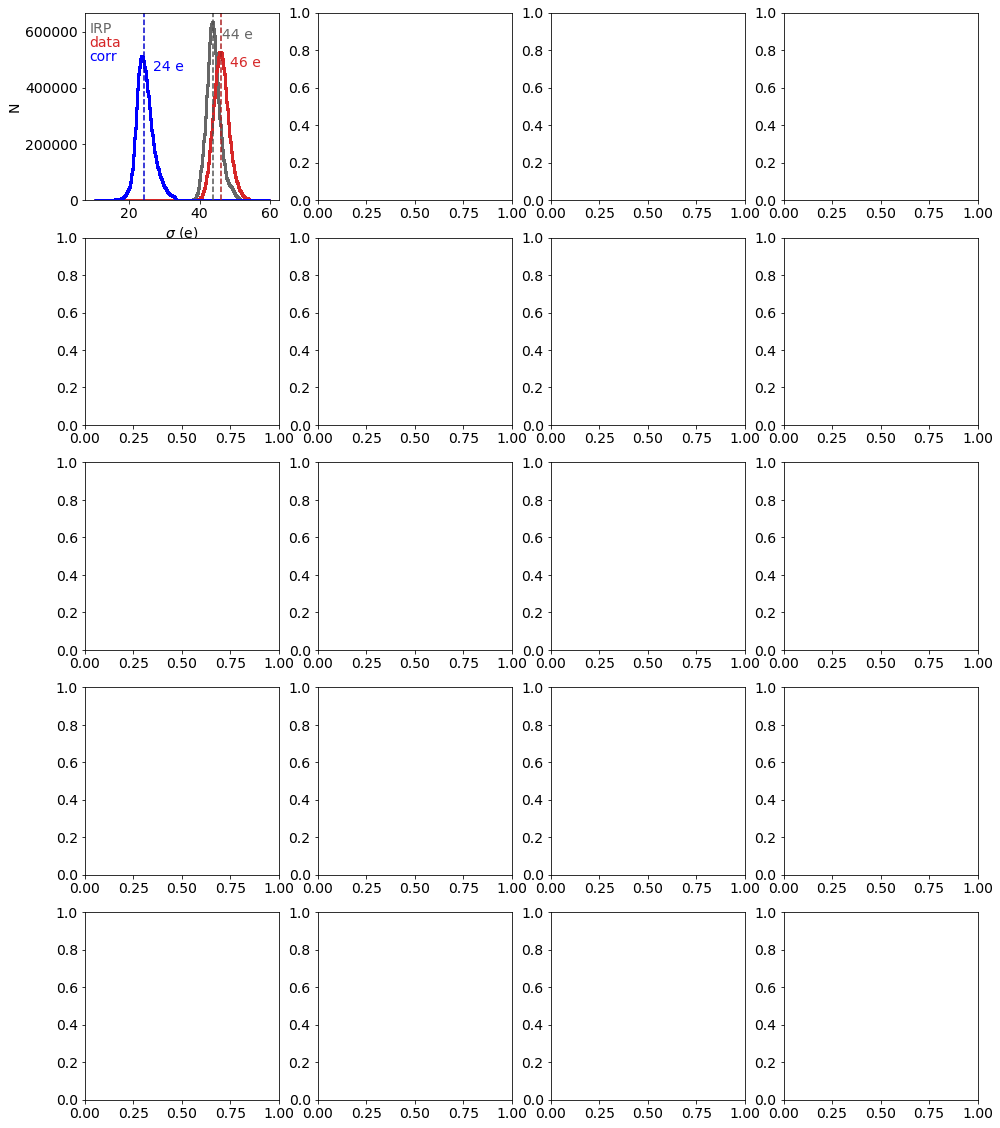

In [55]:
%%time
fsize=4
fig, axarr = plt.subplots(5,4, figsize=(4*fsize, 5*fsize))


for idx,ax in enumerate(axarr.flatten()[:-1]):
    if np.isclose( upper_arr[idx], 0 ).all():
        upper = None
    else:
        upper = upper_arr[idx]
    var = makefigures_noise.load_variancemaps ( rampids[idx] )
    out = makefigures_noise.mk_varhists ( var, ax=ax, upper=upper, show_legend=idx==0 )
    upper_arr[idx] = out[1][:,5]

fig.delaxes(axarr[4,3])
plt.tight_layout ()
plt.savefig('../figures/varhists.png')